In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats # maybe whatever I use from here wont need setastest from .decorators
hiv = pd.read_csv('./DOHMH_HIV_AIDS_Annual_Report.csv')

In [3]:
hiv['Year'].unique()
# hiv['Borough'].unique()

array([2011, 2012, 2013, 2014, 2015])

In [4]:
pd.set_option('display.min_rows', 20)
hiv.replace(99999.0, np.nan, inplace=True)
hiv.head()

,Year,Borough,UHF,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
0,2011,All,All,All,All,All,3379,48.3,640,66.0,2366.0,33.8,1.1,71.0,2040.0,13.6,5.8,7.8
1,2011,All,All,Male,All,All,2595,79.1,480,66.0,1712.0,52.2,1.7,72.0,1423.0,13.4,5.7,7.7
2,2011,All,All,Female,All,All,733,21.1,153,66.0,622.0,17.6,0.6,68.0,605.0,14.0,6.0,8.0
3,2011,All,All,Transgender,All,All,51,NaN,7,63.0,32.0,NaN,NaN,55.0,12.0,11.1,5.7,5.4
4,2011,All,All,Female,13 - 19,All,47,13.6,4,64.0,22.0,6.4,0.1,57.0,1.0,1.4,1.4,0.0


In [4]:
# I want the rows for each year where Borough through Race is 'All' for every column
hiv_byyear=hiv.loc[(hiv['Borough']=='All') & (hiv['UHF']=='All') & (hiv['Gender']=='All') & (hiv['Age']=='All') & (hiv['Race']=='All')]

In [3]:
# From the 2016 HIV surveillance report, the 2016 deaths are incomplete, and the deaths are from ANY CAUSE
#   in people that have HIV/AIDS. There's some other details in the report as well
#   https://www1.nyc.gov/assets/doh/downloads/pdf/dires/hiv-surveillance-mid-year-report-2016.pdf
# Lets first plot HIV and AIDS diagnoses with year above HIV and AIDS diagnosis rate with year
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(5,7))
hiv_byyear.plot.bar(x='Year', y=['HIV diagnoses', 'AIDS diagnoses'], ax=axes[0], colormap='winter')
hiv_byyear.plot.bar(x='Year', y=['HIV diagnosis rate', 'AIDS diagnosis rate'], ax=axes[1], colormap='winter', ylabel='Percent')
plt.show()


NameError: name 'hiv_byyear' is not defined

In [62]:
hiv.describe()

,Year,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
count,6005.000000,6005.000000,6000.000000,6005.000000,4483.000000,6004.000000,5999.000000,5986.000000,5850.000000,6003.000000,6005.000000,4804.000000,4804.000000
mean,2013.000000,26.494588,36.268583,5.095087,72.366050,16.650067,22.870812,1.118961,76.736239,16.147593,10.341632,4.231349,6.577331
std,1.414331,130.995148,51.608089,24.492574,25.274743,82.497608,35.375866,1.462418,15.350646,80.409048,16.379212,9.888912,12.532452
min,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.000000,0.000000,0.000000,64.000000,0.000000,0.000000,0.200000,71.000000,0.000000,0.000000,0.000000,0.000000
50%,2013.000000,3.000000,18.500000,1.000000,75.000000,2.000000,10.300000,0.600000,79.000000,1.000000,6.000000,0.000000,2.800000
75%,2014.000000,13.000000,49.300000,3.000000,100.000000,8.000000,30.500000,1.500000,86.000000,8.000000,14.100000,5.400000,8.500000
max,2015.000000,3379.000000,635.300000,640.000000,100.000000,2366.000000,494.500000,15.300000,100.000000,2040.000000,263.200000,172.200000,210.500000


In [12]:
def missing_entries(dframe):
    '''prints numbers of missing entries (True) for each column in dframe'''
    missing_d = dframe.isnull()
    for col in missing_d.columns.values.tolist():
      print(col)
      print(missing[col].value_counts())
    return 

In [13]:
missing_entries(hiv)

Year
False    6005
Name: Year, dtype: int64
Borough
False    6005
Name: Borough, dtype: int64
UHF
False    6005
Name: UHF, dtype: int64
Gender
False    6005
Name: Gender, dtype: int64
Age
False    6005
Name: Age, dtype: int64
Race
False    6005
Name: Race, dtype: int64
HIV diagnoses
False    6005
Name: HIV diagnoses, dtype: int64
HIV diagnosis rate
False    6005
Name: HIV diagnosis rate, dtype: int64
Concurrent diagnoses
False    6005
Name: Concurrent diagnoses, dtype: int64
% linked to care within 3 months
False    6005
Name: % linked to care within 3 months, dtype: int64
AIDS diagnoses
False    6005
Name: AIDS diagnoses, dtype: int64
AIDS diagnosis rate
False    6005
Name: AIDS diagnosis rate, dtype: int64
PLWDHI prevalence
False    6005
Name: PLWDHI prevalence, dtype: int64
% viral suppression
False    6005
Name: % viral suppression, dtype: int64
Deaths
False    6005
Name: Deaths, dtype: int64
Death rate
False    6005
Name: Death rate, dtype: int64
HIV-related death rate
False    60

In [6]:
hiv[0:40]

,Year,Borough,UHF,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
0,2011,All,All,All,All,All,3379,48.3,640,66.0,2366.0,33.8,1.1,71.0,2040.0,13.6,5.8,7.8
1,2011,All,All,Male,All,All,2595,79.1,480,66.0,1712.0,52.2,1.7,72.0,1423.0,13.4,5.7,7.7
2,2011,All,All,Female,All,All,733,21.1,153,66.0,622.0,17.6,0.6,68.0,605.0,14.0,6.0,8.0
3,2011,All,All,Transgender,All,All,51,NaN,7,63.0,32.0,NaN,NaN,55.0,12.0,11.1,5.7,5.4
4,2011,All,All,Female,13 - 19,All,47,13.6,4,64.0,22.0,6.4,0.1,57.0,1.0,1.4,1.4,0.0
5,2011,All,All,Female,20 - 29,All,178,24.7,20,67.0,96.0,13.3,0.3,48.0,19.0,7.2,3.2,4.0
6,2011,All,All,Female,30 - 39,All,176,26.9,31,66.0,133.0,20.3,0.6,61.0,53.0,9.4,5.7,3.7
7,2011,All,All,Female,40 - 49,All,195,33.0,50,62.0,210.0,35.5,1.4,66.0,184.0,15.9,7.8,8.1
8,2011,All,All,Female,50 - 59,All,130,23.5,32,72.0,133.0,24.0,1.3,73.0,231.0,24.1,11.5,12.6
9,2011,All,All,Female,60+,All,57,6.7,23,68.0,60.0,7.1,0.3,81.0,129.0,33.5,10.6,22.9


In [7]:
# Next, want 2 pie charts, one for males and one for females, that show the "Deaths" in each borough for each year.
#   So, should have 10 pie charts total
hiv_males=hiv.loc[(hiv['Borough']!='All') & (hiv['UHF']=='All') & (hiv['Gender']=='Male') & (hiv['Age']=='All') & (hiv['Race']=='All')]
hiv_females=hiv.loc[(hiv['Borough']!='All') & (hiv['UHF']=='All') & (hiv['Gender']=='Female') & (hiv['Age']=='All') & (hiv['Race']=='All')]
hiv_males

,Year,Borough,UHF,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
45,2011,Bronx,All,Male,All,All,414,80.2,98,73.0,365.0,70.7,2.3,67.0,335.0,16.0,7.5,8.6
245,2011,Brooklyn,All,Male,All,All,678,69.3,150,70.0,449.0,45.9,1.4,70.0,343.0,15.1,6.4,8.7
545,2011,Manhattan,All,Male,All,All,704,105.9,102,73.0,408.0,61.4,2.6,77.0,305.0,10.1,4.7,5.5
820,2011,Queens,All,Male,All,All,386,41.3,75,74.0,218.0,23.4,0.9,71.0,126.0,8.6,3.3,5.3
1095,2011,Staten Island,All,Male,All,All,27,14.3,12,63.0,25.0,13.2,0.6,70.0,41.0,20.5,9.4,11.1
1246,2012,Bronx,All,Male,All,All,400,76.5,82,69.0,302.0,57.8,2.3,73.0,306.0,13.9,5.2,8.7
1447,2012,Brooklyn,All,Male,All,All,577,58.2,120,71.0,395.0,39.9,1.4,75.0,340.0,12.8,5.8,7.0
1746,2012,Manhattan,All,Male,All,All,671,99.8,111,73.0,358.0,53.2,2.6,81.0,267.0,7.2,2.3,5.0
2021,2012,Queens,All,Male,All,All,379,40.3,75,70.0,209.0,22.2,0.9,78.0,105.0,6.9,3.1,3.9
2296,2012,Staten Island,All,Male,All,All,23,12.2,2,61.0,28.0,14.8,0.6,73.0,25.0,14.2,5.5,8.8


In [21]:
# fig, axes = plt.subplots(nrows=5, ncols=2, sharex=True, figsize=(5,12))
hiv_females.loc[hiv_females['Year']==2015]['Deaths']

4837    171.0
5037    118.0
5337     59.0
5612     53.0
5887     13.0
Name: Deaths, dtype: float64

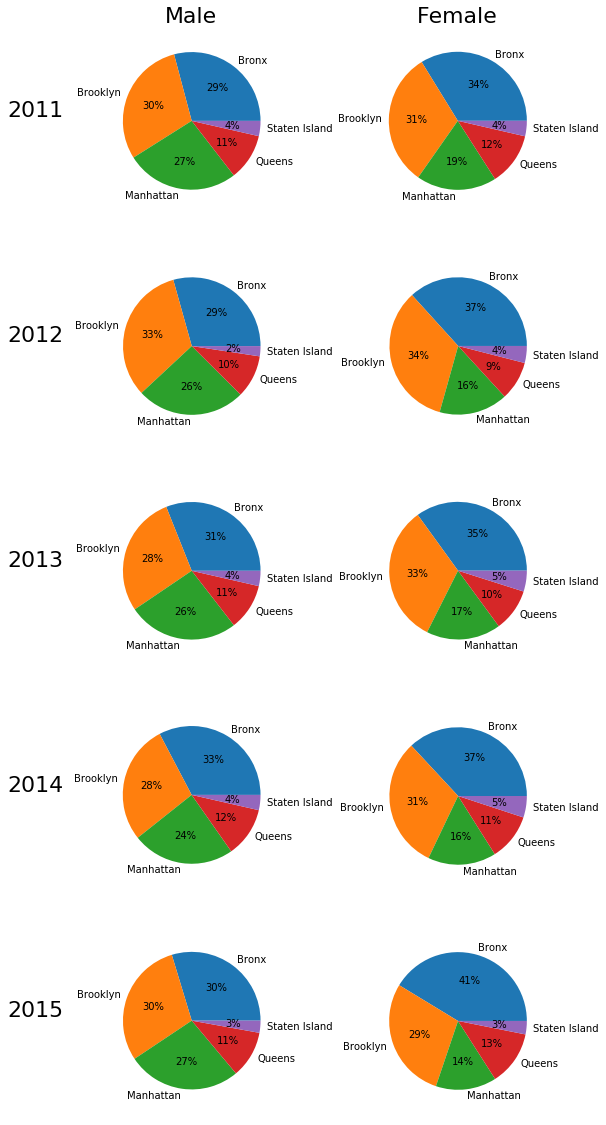

In [8]:
num_unique_years = len(pd.unique(hiv_males['Year']))
fig2, axes2 = plt.subplots(nrows=num_unique_years, ncols=2, figsize=(7.5,20))
for i in range(num_unique_years):
    year = pd.unique(hiv_males['Year'])[i]
    hiv_males.loc[hiv_males['Year']==year].reset_index(drop=True).plot.pie(y='Deaths', ax=axes2[i,0], labels=hiv_males['Borough'],
                                                                           ylabel='', xticks=[], legend=None, autopct='%1.0f%%')
    hiv_females.loc[hiv_females['Year']==year].reset_index(drop=True).plot.pie(y='Deaths', ax=axes2[i,1],
                                                                               labels=hiv_females['Borough'],
                                                                               ylabel='', 
                                                                               legend=None,
                                                                               autopct='%1.0f%%')
    axes2[i,0].axis('equal')
    axes2[i,1].axis('equal')
    axes2[i,0].set_ylabel(year, labelpad=80, fontsize=22, rotation='horizontal')
axes2[0,0].set_xlabel('Male', fontsize=22)
axes2[0,1].set_xlabel('Female', fontsize=22)
axes2[0,0].xaxis.set_label_position('top')
axes2[0,1].xaxis.set_label_position('top')
# fig2.legend(labels=pd.unique(hiv_males['Borough']))

fig2.subplots_adjust(wspace=0.75)
plt.show()

In [4]:
# Next, want a bar chart showing % of PLWDHI that have viral suppression by age group for each sex;
#   One chart for 2011 and one for 2015 (not selecting for borough)
hiv_viral=hiv.loc[(hiv['Borough']=='All') & (hiv['UHF']=='All') & (hiv['Age']!='All') & (hiv['Race']=='All')]
hiv_viral

,Year,Borough,UHF,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
4,2011,All,All,Female,13 - 19,All,47,13.6,4,64.0,22.0,6.4,0.1,57.0,1.0,1.4,1.4,0.0
5,2011,All,All,Female,20 - 29,All,178,24.7,20,67.0,96.0,13.3,0.3,48.0,19.0,7.2,3.2,4.0
6,2011,All,All,Female,30 - 39,All,176,26.9,31,66.0,133.0,20.3,0.6,61.0,53.0,9.4,5.7,3.7
7,2011,All,All,Female,40 - 49,All,195,33.0,50,62.0,210.0,35.5,1.4,66.0,184.0,15.9,7.8,8.1
8,2011,All,All,Female,50 - 59,All,130,23.5,32,72.0,133.0,24.0,1.3,73.0,231.0,24.1,11.5,12.6
9,2011,All,All,Female,60+,All,57,6.7,23,68.0,60.0,7.1,0.3,81.0,129.0,33.5,10.6,22.9
15,2011,All,All,Male,13 - 19,All,140,39.4,7,52.0,33.0,9.3,0.1,51.0,1.0,1.4,1.4,0.0
16,2011,All,All,Male,20 - 29,All,957,142.1,104,62.0,370.0,54.9,0.7,54.0,47.0,6.4,3.6,2.8
17,2011,All,All,Male,30 - 39,All,649,105.4,122,67.0,405.0,65.7,1.4,67.0,90.0,7.1,3.7,3.4
18,2011,All,All,Male,40 - 49,All,517,93.9,138,74.0,506.0,91.9,3.2,72.0,354.0,12.8,6.7,6.1


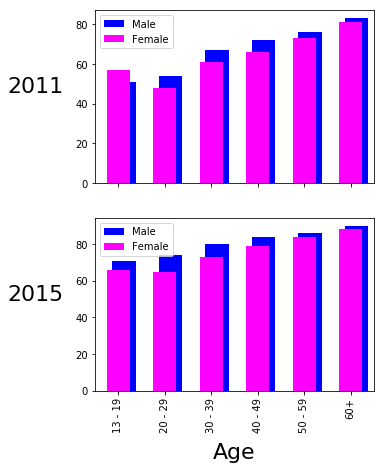

In [15]:
fig3, axes3 = plt.subplots(nrows=2, sharex=True, figsize=(5,7))
hiv_viral_male=hiv_viral.loc[(hiv_viral['Year']==2011) & (hiv_viral['Gender']=='Male')]
hiv_viral_female=hiv_viral.loc[(hiv_viral['Year']==2011) & (hiv_viral['Gender']=='Female')]

hiv_viral_male_15=hiv_viral.loc[(hiv_viral['Year']==2015) & (hiv_viral['Gender']=='Male')]
hiv_viral_female_15=hiv_viral.loc[(hiv_viral['Year']==2015) & (hiv_viral['Gender']=='Female')]

hiv_viral_male.plot.bar(x='Age', y='% viral suppression', ax=axes3[0], position=0.25, color='blue', ylabel='2011', label='Male')
hiv_viral_female.plot.bar(x='Age', y='% viral suppression', ax=axes3[0], color='magenta', ylabel='2011', label='Female')
# fontsize needs to be set in the axes
hiv_viral_male_15.plot.bar(x='Age', y='% viral suppression', ax=axes3[1], position=0.25, color='blue', ylabel='2015', label='Male')
hiv_viral_female_15.plot.bar(x='Age', y='% viral suppression', ax=axes3[1], color='magenta', ylabel='2015', label='Female')

axes3[0].set_ylabel('2011', fontsize=22, labelpad=40, rotation='horizontal')
axes3[1].set_ylabel('2015', fontsize=22, labelpad=40, rotation='horizontal')
axes3[1].set_xlabel('Age', fontsize=22, labelpad=10)
plt.show()

In [39]:
national = pd.DataFrame(["white"]*100000 + ["hispanic"]*60000 +\
                       ["black"]*50000 + ["asian"]*15000 + ["other"]*35000)
minnesota = pd.DataFrame(["white"]*600 + ["hispanic"]*300 + ["black"]*250 +\
                        ["asian"]*75 + ["other"]*150)
national_table = pd.crosstab(index=national[0], columns="count")
minnesota_table = pd.crosstab(index=minnesota[0], columns="count")
# print("national_table")
# print(national_table)
# print("minnesota_table")
# print(minnesota_table)


observed = minnesota_table
national_ratios = national_table/len(national)
expected = national_ratios * len(minnesota)
print(observed)
print(expected)
stats.chisquare(f_obs = observed, f_exp = expected)

col_0     count
0              
asian        75
black       250
hispanic    300
other       150
white       600
col_0          count
0                   
asian      79.326923
black     264.423077
hispanic  317.307692
other     185.096154
white     528.846154


Power_divergenceResult(statistic=array([18.19480519]), pvalue=array([0.00113047]))

In [17]:
# 2 chi squared tests here for HIV diagnoses: one that we think should fail and one that we think should succeed
#   using males and 2015 due to larger sample sizes
#   Should fail (case 1) : null hypothesis that hiv diagnoses of all 50-59 yr old males has the same distribution of hiv
#                          diagnoses of all 20-29 yr old males (not doing 60+ or staten island due to low counts)
#   Should not fail (case 2) : null hypothesis that the Manhattan borough has the same distribution of hiv diagnoses by age group
#                    for males as the hiv diagnoses distribution for all boroughs

In [18]:
# Case 1
hiv_20_29=hiv.loc[(hiv['Borough']!='All') & (hiv['Borough']!='Staten Island') & (hiv['UHF']=='All') & (hiv['Age']=='20 - 29')\
                  & (hiv['Race']=='All')  & (hiv['Year']==2015) & (hiv['Gender']=='Male')]
hiv_50_59=hiv.loc[(hiv['Borough']!='All') & (hiv['Borough']!='Staten Island') & (hiv['UHF']=='All') & (hiv['Age']=='50 - 59') & (hiv['Race']=='All')\
                  & (hiv['Year']==2015) & (hiv['Gender']=='Male')]
#hiv_20_29
_20_29 = hiv_20_29['HIV diagnoses']
#exp
obs = hiv_50_59['HIV diagnoses']
_20_29_ratios = _20_29 / _20_29.sum()
# _20_29_ratios
exp = _20_29_ratios*(obs.sum())
# print(obs)
# print(exp)
stats.chisquare(f_obs = obs, f_exp = exp)

Power_divergenceResult(statistic=2.8431933331353134, pvalue=0.41643879501499736)

In [41]:
# Case 2
hiv_manhattan=hiv.loc[(hiv['Borough'] == 'Manhattan') & (hiv['UHF']=='All') & (hiv['Age']!='All') \
                  & (hiv['Race']=='All')  & (hiv['Year']==2015) & (hiv['Gender']=='Male')]
hiv_all=hiv.loc[(hiv['Borough'] == 'All') & (hiv['UHF']=='All') & (hiv['Age']!='All') \
                  & (hiv['Race']=='All')  & (hiv['Year']==2015) & (hiv['Gender']=='Male')]
obs = hiv_manhattan['HIV diagnoses']
all_boroughs = hiv_all['HIV diagnoses']
ratio = all_boroughs / all_boroughs.sum()
exp = obs.sum()*ratio
stats.chisquare(f_obs = obs, f_exp = exp)
# print(obs)
# print(all_boroughs)
# we can reject the null hypothesis if we are assuming a 95% confidence interval, but this could be due to 
#   the small sample size for the manhattan age group OR simply that they do not belong to the same distribution

Power_divergenceResult(statistic=8.086345484638445, pvalue=0.15154072160525103)